# Etiqueter les symboles

## Usage 
- Filtrer certains éléments du texte (nettoyage, normalisation)
- Utiliser les tags en temps que tel (extraction de connaissance)
- Utiliser les tags comme données additionnelles pour l'entrainement d'un modèle

## Taches ou le tagging contribue (Dans le NLP)
- POS (Part Of Speech)
- Lemmatisation (Cf: [01_Introduction💕.ipynb](./01_Introduction💕.ipynb))
- Inflectional Morphology (L'étude des ajouts au lem la forme canonique du mot Cf: [01_Introduction💕.ipynb](./01_Introduction💕.ipynb) + A enqueter)
    - Exemple : banane*s* avec l'Inflectional Morphology on sait que c'est au pluriel grace au s

- Dependency Parsing (Quel rôle ont chacun des tokens vis a vis de chaque token)
    - Exemple : "Le vent violent aujourd'hui" -->  Le mot vent est dépendants de violent.
    - Chaque relation entre mots sont catégorisé dans un referenciel nommée : Universial Dependencies qui compte 37 catégories de dépendances. (Chaque mots sera dépendant d'un seul autre token / mot)

- NER : Named Entity Recognition
    - Capacité a reconnaitre des noms propre ou des acronymes et a les catégoriser comme des objects du réel, néanmois si un token rentre dans plusieurs catégories on va devoir utiliser de l'Entity Linking pour réussir a le classifier
    - Les catégories les plus utilisé sont celles sur les noms des : Organisations, Personnes, Date heure...
    - Exemple : Nom: Doe Prenom: John --> Nom propre: John Doe 

- Entity Linking
    - Relié une entité nommée à une base de connaissance sur des données du réel
    - Exemple: Relier une entité nommée dans un concept dans Wiki Data (DB de Wikipédia)


### Objectif : tagger le texte suivant
```
text = """NASA is "go" for a post-breakfast launch of the biggest rocket ever—and that
includes the final flight of the Saturn V in 1973. A flight readiness review
this week confirmed that its Artemis-1 mission will launch during a two-hour
window that opens at 8:33 a.m. EDT on Monday, August 29. However, if for any
reason it doesn’t launch on schedule then the next time it can go is at
lunchtime on Friday, September 2, 2022."""
```

In [2]:
text = """NASA is "go" for a post-breakfast launch of the biggest rocket ever—and that
includes the final flight of the Saturn V in 1973. A flight readiness review
this week confirmed that its Artemis-1 mission will launch during a two-hour
window that opens at 8:33 a.m. EDT on Monday, August 29. However, if for any
reason it doesn’t launch on schedule then the next time it can go is at
lunchtime on Friday, September 2, 2022."""

In [8]:
# Part-Of-Speech

import spacy
import pandas as pd 

nlp = spacy.load('en_core_web_lg')
doc = nlp(text)

token_dic = {
    'Text': [token.text for token in doc],
    'POS tag': [token.pos_ for token in doc],
    'Morph': [token.morph for token in doc]
}

pd.DataFrame.from_dict(token_dic).to_excel('04_Tagging.xlsx', index=False) 
# Voir les erreurs du modele en rouge dans le Excel
"""
    Les erreurs sont du a une utilisation très rare de is & go  dans "Nasa is "go"" et dans ce cas "is" est le verbe 
    et "go" est l'auxiliaire en autre. 
"""

[Number=Sing, Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin, PunctSide=Ini|PunctType=Quot, VerbForm=Inf, PunctSide=Fin|PunctType=Quot, , Definite=Ind|PronType=Art, Degree=Pos, Degree=Pos, Degree=Pos, Number=Sing, , Definite=Def|PronType=Art, Degree=Sup, Number=Sing, , , ConjType=Cmp, , , Number=Sing|Person=3|Tense=Pres|VerbForm=Fin, Definite=Def|PronType=Art, Degree=Pos, Number=Sing, , Definite=Def|PronType=Art, Number=Sing, Number=Sing, , NumType=Card, PunctType=Peri, Definite=Ind|PronType=Art, Number=Sing, Number=Sing, Number=Sing, , Number=Sing|PronType=Dem, Number=Sing, Tense=Past|VerbForm=Fin, , Gender=Neut|Number=Sing|Person=3|Poss=Yes|PronType=Prs, Number=Sing, Number=Sing, VerbForm=Fin, VerbForm=Inf, , Definite=Ind|PronType=Art, NumType=Card, PunctType=Dash, Number=Sing, , Number=Sing, PronType=Rel, Number=Sing|Person=3|Tense=Pres|VerbForm=Fin, , NumType=Card, Number=Sing, Number=Sing, , Number=Sing, PunctType=Comm, Number=Sing, NumType=Card, PunctType=Peri, , PunctType

## Les cas les plus courrant :
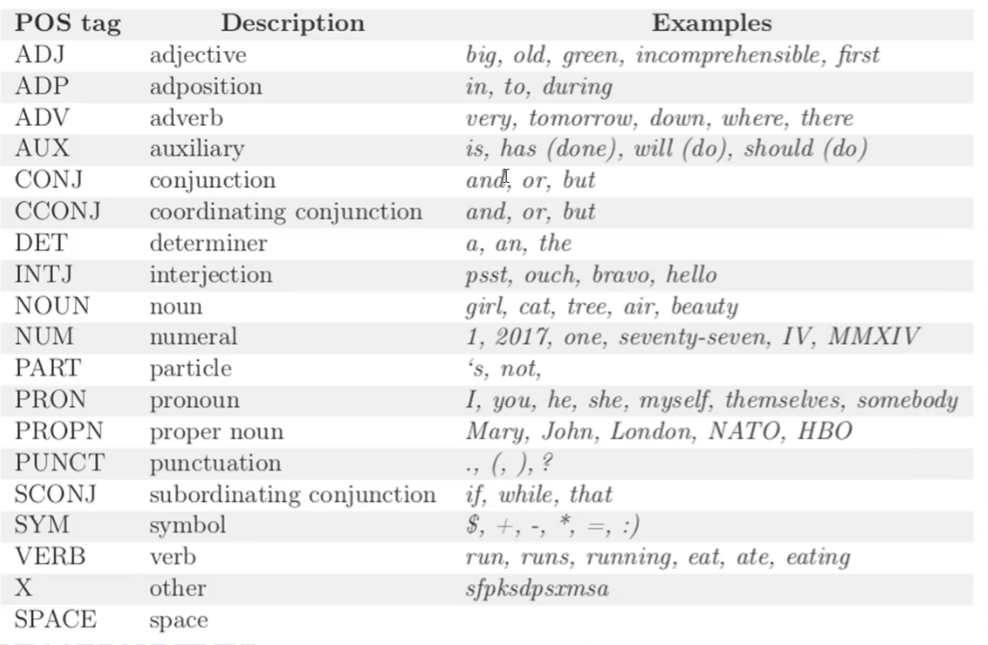

# Liste presque exostive des tags:
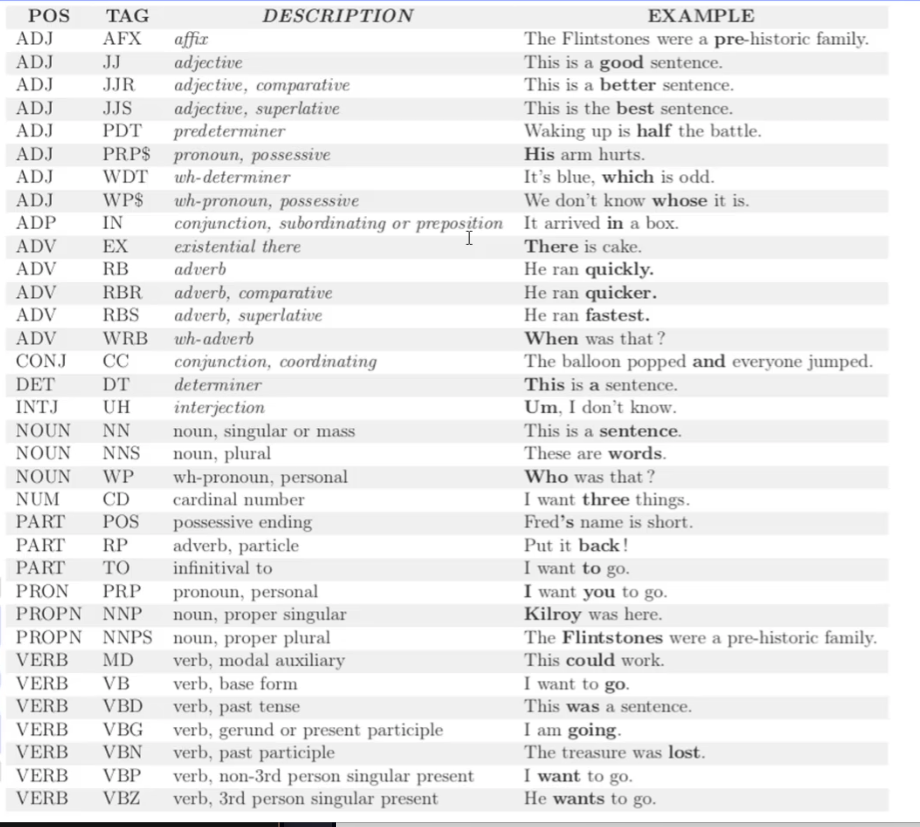

In [9]:
# Les dépendances

token_dep_dict = {
    'Texte': [token.text for token in doc],
    'Type de dépendance': [token.dep_ for token in doc],
    'Dépendance': [token.head.text for token in doc]
}

with pd.ExcelWriter('04_Tagging.xlsx', engine='openpyxl', mode='a') as writer:
    # Écrire le nouveau DataFrame dans une nouvelle feuille de calcul
    pd.DataFrame.from_dict(token_dep_dict).to_excel(writer, sheet_name='Dependances', index=False)

## Liste des types de tags 
##### Sources : https://universaldependencies.org/u/dep
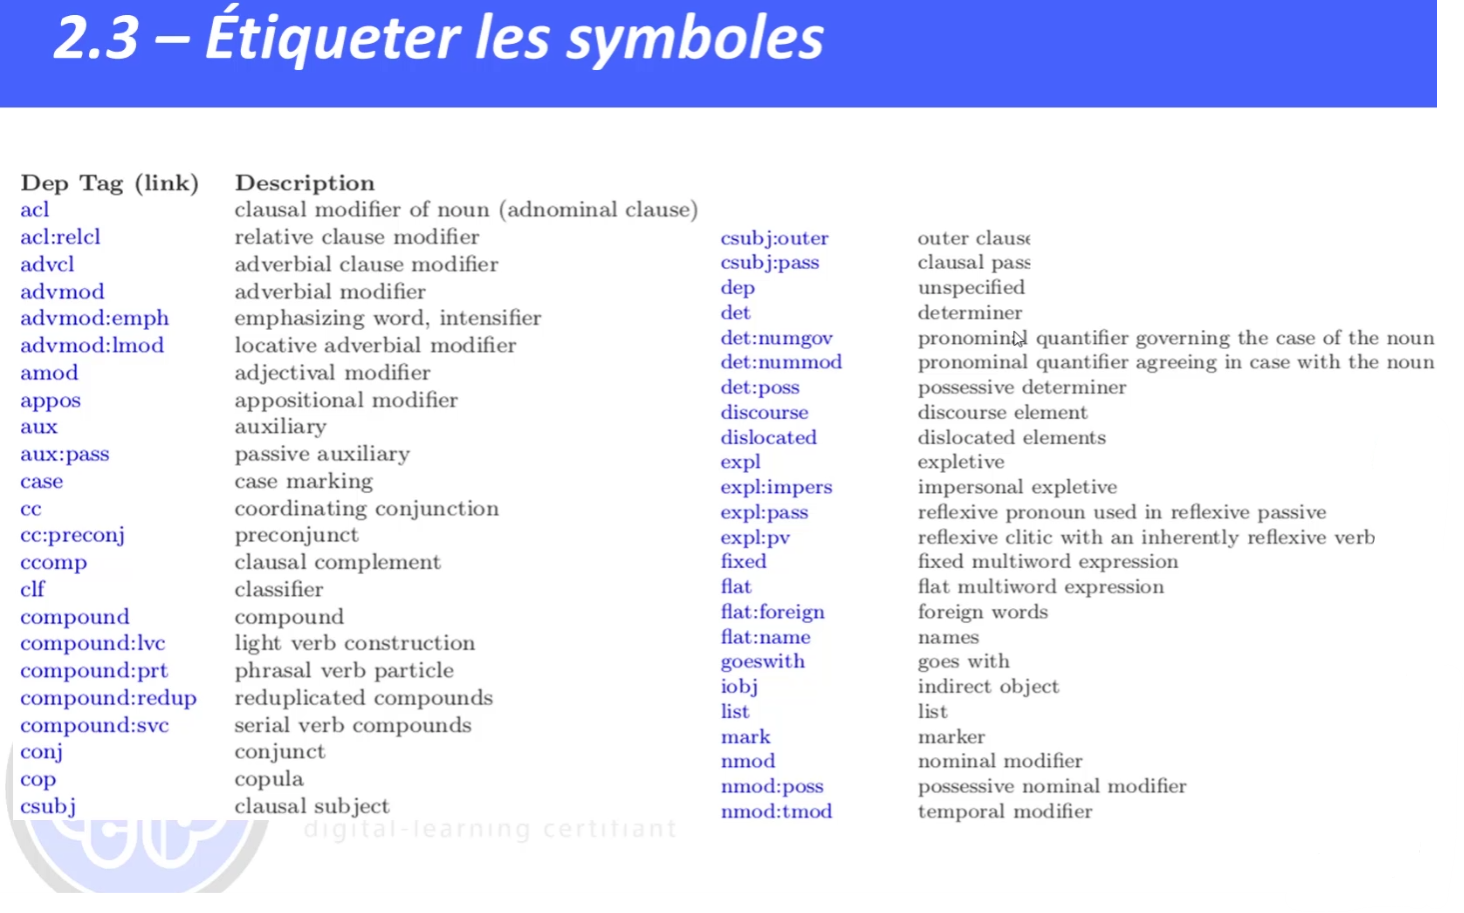

In [12]:
# NER : Reconnaissance d'entités nommées

token_NER_dict = {
    'Text': [entity.text for entity in doc.ents],
    'Label': [entity.label_ for entity in doc.ents]
}

with pd.ExcelWriter('04_Tagging.xlsx', engine='openpyxl', mode='a') as writer:
    # Écrire le nouveau DataFrame dans une nouvelle feuille de calcul
    pd.DataFrame.from_dict(token_NER_dict).to_excel(writer, sheet_name='NER Reco Entites Nommees', index=False)

#### Labels possibles pour le model en_core_web_lg: CARDINAL, DATE, EVENT, FAC, GPE, LANGUAGE, LAW, LOC, MONEY, NORP, ORDINAL, ORG, PERCENT, PERSON, PRODUCT, QUANTITY, TIME, WORK_OF_ART

#### Peut varier selon les models

# Liaison d'enttités

- Lorsqu'il n'y a qu'une seule entité possible pour un nom, alors il s'agit d'un simple match dans une base de données

- Lorsqu'il y a plusieurs entités possibles, il faut une méthode qui permette de choisir une des entités possibles en fonction ou non du contexte 
    - Il ne sera pas forcément possible résoudre ce problèle 😢
    - Model disponible mais extremment gourmant 😉 (Besoin 50Go de RAM)

In [18]:
!python -m pip install spacy-entity-linker spacy-transformers
!python -m spacy_entity_linker "download_knowledge_base"


<frozen runpy>:128: RuntimeWarning: 'spacy_entity_linker.__main__' found in sys.modules after import of package 'spacy_entity_linker', but prior to execution of 'spacy_entity_linker.__main__'; this may result in unpredictable behaviour


In [7]:
# Si ca marche pas redemarrer le Kernel 💘

import spacy
import pandas as pd 

nlp = spacy.load("en_core_web_lg")
doc = nlp(text)
nlp.add_pipe("entityLinker", last = True)
doc = nlp(text)

print('Le résumé des entités WikiData classé par catégories\n')
doc._.linkedEntities.print_super_entities()

print('\nDétails des entités WikiData dans 04_Tagging.xlsx Feuille Liaison d\'entité')

entities_link_dict = {
    'Index phrase': [],
    'Index entité': [],
    'Text': [],
    'Id de l\'entité': [],
    'Label': [],
    'Description': [],
}

for s_index, sentence in enumerate(doc.sents): # Pour toutes les phrases dans le texte avec son index
    for e_index, entity in enumerate(sentence._.linkedEntities):
        entities_link_dict['Index phrase'].append(s_index)
        entities_link_dict['Index entité'].append(e_index)
        entities_link_dict['Text'].append(entity.get_span())
        entities_link_dict['Id de l\'entité'].append(entity.get_id())
        entities_link_dict['Label'].append(entity.get_label())
        entities_link_dict['Description'].append(entity.get_description())

with pd.ExcelWriter('04_Tagging.xlsx', engine='openpyxl', mode='a') as writer:
    # Écrire le nouveau DataFrame dans une nouvelle feuille de calcul
    pd.DataFrame.from_dict(entities_link_dict).to_excel(writer, sheet_name='Liaison d entites', index=False)

Le résumé des entités WikiData classé par catégories

calendar month (2) : August,September
month of the Gregorian calendar (2) : August,September
space agency (1) : National Aeronautics and Space Administration
architectural structure (1) : slipway
vehicle (1) : rocket
disposable product (1) : rocket
flying machine (1) : rocket
novel (1) : Final Flight
Saturn (1) : Saturn V
air force unit (1) : flight

Détails des entités WikiData dans 04_Tagging.xlsx Feuille Liaison d'entité
